# Лабораторная работа 3. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БВТ2102 Гаджиявов Джамал Тимурович
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Выполнение:

In [1]:
graph = [[0, 4, 0, 0, 0, 0],
         [4, 0, 8, 0, 0, 0],
         [0, 8, 0, 7, 0, 4],
         [0, 0, 7, 0, 9, 14],
         [0, 0, 0, 9, 0, 10],
         [0, 0, 4, 14, 10, 0]]

In [2]:
# Дейкстра O(m*n)
# Алгоритм Дейкстры использует жадный подход для нахождения кратчайшего пути. 
# Он поддерживает список S вершин, для которых уже найден кратчайший путь, 
# и список Q вершин, для которых путь еще не найден. На каждом шаге алгоритма 
# мы выбираем из списка Q вершину u с наименьшим значением расстояния d[u], 
# добавляем ее в список S, и обновляем расстояния до всех ее соседей v таким 
# образом: если d[u] + w(u, v) < d[v], то мы обновляем d[v] = d[u] + w(u, v).
import sys


def _dijkstra(graph, start):
    n = len(graph)
    dist = {i: {'dist': sys.maxsize, 'prev': None} for i in range(n)}
    dist[start]['dist'] = 0
    visited = set([start])

    while len(visited) != n:
        min_dist = sys.maxsize
        next_node = None

        for node in visited:
            for neighbor, weight in enumerate(graph[node]):
                if neighbor not in visited and weight > 0:
                    new_dist = dist[node]['dist'] + weight
                    if new_dist < dist[neighbor]['dist']:
                        dist[neighbor]['dist'] = new_dist
                        dist[neighbor]['prev'] = node
                        if new_dist < min_dist:
                            min_dist = new_dist
                            next_node = neighbor

        visited.add(next_node)

    return dist


def get_path(end, distances):
    path = [end]
    prev = distances[end]['prev']
    while prev is not None:
        path.append(prev)
        prev = distances[prev]['prev']
    return path[::-1]


def dijkstra(graph, start, end):
    distances = _dijkstra(graph, start)
    path = get_path(end, distances)
    dist = distances[end]["dist"]
    return path, dist

In [3]:
# флойда йортшильда O(n^3)
# Алгоритм Флойда-Ротшильда использует динамическое программирование для нахождения кратчайших путей.
# Он поддерживает матрицу расстояний D размера n x n, где D[i][j] - длина кратчайшего пути из вершины i в вершину j.

def floyd_warshall(graph):
    n = len(graph)
    dist = [[float('inf') for _ in range(n)] for _ in range(n)]

    for i in range(n):
        for j in range(n):
            if i == j:
                dist[i][j] = 0
            elif graph[i][j] != 0:
                dist[i][j] = graph[i][j]

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if dist[i][j] > dist[i][k] + dist[k][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]

    return dist

In [4]:
# Беллмана O(n*m)
# Алгоритм Форда-Беллмана – алгоритм нахождения кратчайшего
# пути во взвешенном графе с отрицательными ребрами. 
# Он работает с графом, содержащим рёбра с отрицательными весами, 
# но не должен содержать циклы отрицательного веса, иначе алгоритм не сможет дать правильный результат.
# 
# Алгоритм Форда-Беллмана можно описать следующим образом:
# 
# 1. Создать массив расстояний dist размером N и заполнить его значениями, 
# соответствующими расстояниям между вершиной s и всеми остальными вершинами графа. 
# Для вершины s расстояние равно 0, для всех остальных вершин – бесконечности.
# 
# 2. Повторить N-1 раз следующие действия:
# 
#    2.1. Проитерироваться по всем ребрам графа.
# 
#    2.2. Если расстояние до вершины v через вершину u меньше текущего расстояния до v, то обновить значение dist[v].
# 
# 3. Проверить наличие отрицательных циклов в графе.
a = set()

def bellman_ford(graph, s):
    n = len(graph)
    dist = [float('inf') for _ in range(n)]
    dist[s] = 0

    for _ in range(n - 1):
        for u in range(n):
            for v, w in graph[u]:
                if dist[u] + w < dist[v]:
                    
                    dist[v] = dist[u] + w

    for u in range(n):
        for v, w in graph[u]:
            if dist[u] + w < dist[v]:
                return None, "Negative cycle detected"

    return dist, None


def adjacency_list(adj_matrix):
    adj_list = [[] for _ in range(len(adj_matrix))]
    for i in range(len(adj_matrix)):
        for j in range(len(adj_matrix)):
            if adj_matrix[i][j] != 0:
                adj_list[i].append((j, adj_matrix[i][j]))
    return adj_list

### Вывод

In [5]:
print((dk := dijkstra(graph, 0, 5))[1])
print(floyd_warshall(graph)[0][-1])
print(bellman_ford(adjacency_list(graph), 0)[0][-1])

16
16
16


0 > 1 > 2 > 5


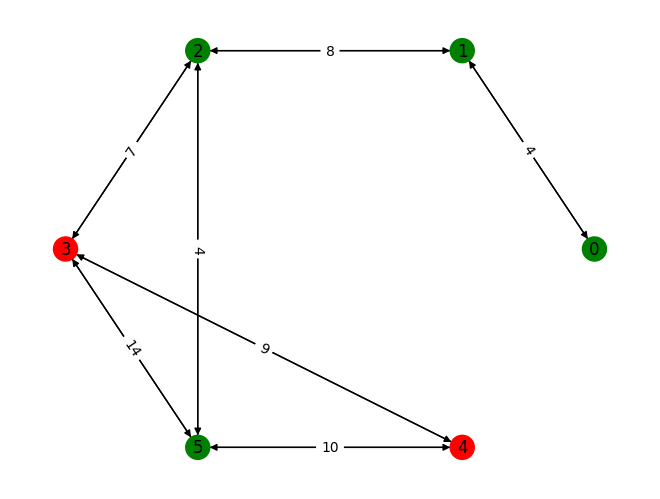

In [6]:
from collections import defaultdict
import networkx as nx
import matplotlib.pyplot as plt
import timeit
import pandas as pd

color_map = []
G = nx.DiGraph()

result = []

for u in range(len(graph)):
    for v in range(len(graph)):
      if result != 0:
        result.append((u, v, graph[u][v]))

for i in result:
    u,v,w = i
    if w != 0:
        G.add_edge(u,v, weight = w)
    
for node in G:
    if node in dk[0]:
        color_map.append('green')
    else:
        color_map.append('red')
pos=nx.circular_layout(G)
print(*dk[0], sep = " > ")
nx.draw(G, pos, node_color=color_map, with_labels=True)
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

In [7]:
table_data = [["Дейкстры", "O(m*n)"], ["Флойда-Уоршелла", "O(n^3)"], ["Беллмана", "O(n*m)"]]
pd.DataFrame(table_data, columns=["Name", "O(algos)"])

,Name,O(algos)
0,Дейкстры,O(m*n)
1,Флойда-Уоршелла,O(n^3)
2,Беллмана,O(n*m)
